In [29]:
import gzip
from collections import defaultdict
from sklearn import linear_model
import string
import re
import datetime, time
import matplotlib.pyplot as plt
import numpy as np
import math
import sys

In [ ]:
#####
# SETUP
#####

In [2]:
def readCSV(path):
    f = open(path, 'rt')
    f.readline()

    for l in f:
        
        if l.startswith("timestamp"): 
            continue

        try: 
            timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education = re.split(r',(?![ ])', l)

        except:
            continue

        yield timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education


In [3]:
salaryRaw = []
for l in readCSV("Levels_Fyi_Salary_Data.csv"):
    salaryRaw.append(l)

In [4]:
print(len(salaryRaw))
print(salaryRaw[64])

62300
('9/11/2017 13:51:51', 'Apple', 'ICT3', 'Software Engineer', '210000', '"Cupertino, CA"', '3', '2', 'NA', '130000', '50000', '30000', 'NA', 'NA', '7158', '807', '98', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'NA', 'NA\n')


In [6]:
# id , unixtime, company, level, title, total_comp, city, state, experience, tenure, tag, 
# salary, stock, bonus, city_id, dma_id, ms_deg, bs_deg, phd_deg, hs, college

salaryAllData = []

# convert date/time to unix time

for entry in salaryRaw:

    date, clocktime = entry[0].split(' ')
    date = date.split('/')
    clocktime = clocktime.split(':')
    timestamp = datetime.datetime(int(date[2]), int(date[0]), int(date[1]), int(clocktime[0]), int(clocktime[1]), int(clocktime[2]))
    timestamp = int(time.mktime(timestamp.timetuple()))


    company = entry[1]
    level = entry[2]
    title = entry[3]
   
    total_comp = int(float(entry[4]))

    location = entry[5]
    if location.count(',') == 2:
        city, state, country = location.strip('"').split(', ')
    elif location.count(',') == 1:
        city, state = location.strip('"').split(', ')
        country = 'USA'

    experience = entry[6]
    tenure = entry[7]

    tag = entry[8]

    salary = int(float(entry[9]))
    if salary == 0:
        continue

    stock = int(float(entry[10]))
    bonus = int(float(entry[11]))

    g = entry[12]
    gender = -1
    if g == 'Female':
        gender = 0
    elif g == 'Male':
        gender = 1
    elif g == 'Other':
        gender = 2

    city_id = int(entry[14])
    
    try: 
        dma_id = int(entry[15])
    except:
        dma_id = -1
    
    id = int(entry[16])

    ms_deg = int(entry[17])
    bs_deg = int(entry[18])
    phd_deg = int(entry[18])
    hs = int(entry[19])
    college = int(entry[20])

    r = entry[27]
    race = -1
    if r == 'Asian': #11700
        race = 0
    elif r == 'Black': #684
        race = 1
    elif r == 'Hispanic': #1118
        race = 2
    elif r == 'Two Or More': #798
        race = 3
    elif r == 'White': #7975
        race = 4

    salaryAllData.append([id, timestamp, company, level, title, total_comp, city, state, experience, tenure, tag, \
            salary, stock, bonus, gender, city_id, dma_id, ms_deg, bs_deg, phd_deg, hs, college, race])


In [7]:
print(len(salaryAllData))
print(salaryAllData[13423])

59996
[21317, 1580317204, 'Capital One', 'Principal Associate', 'Software Engineer', 136000, 'Washington', 'DC', '13', '2', 'Full Stack', 130000, 0, 6000, 1, 40303, 511, 0, 0, 0, 0, 0, -1]


In [ ]:
####
# PART 1
###

In [8]:
# Number of total datapoints
print(len(salaryAllData))

59996


In [ ]:
# Salary Values

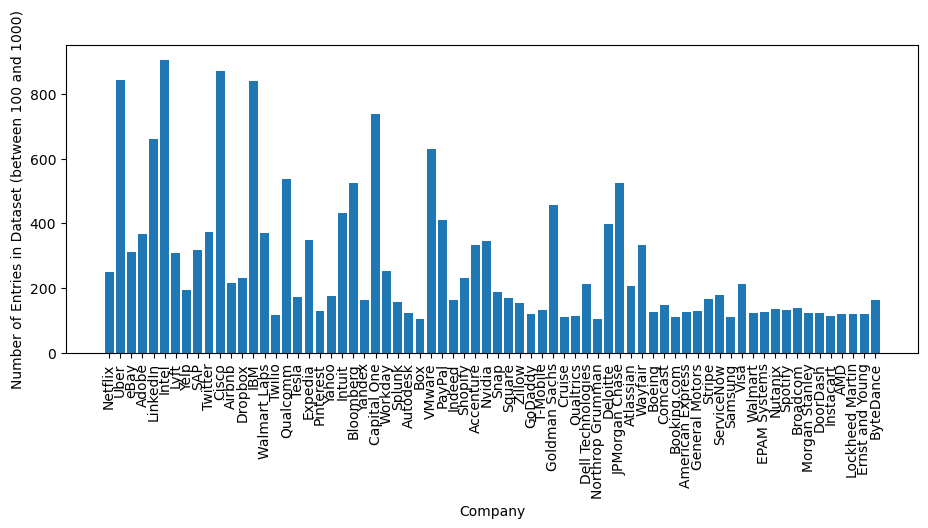

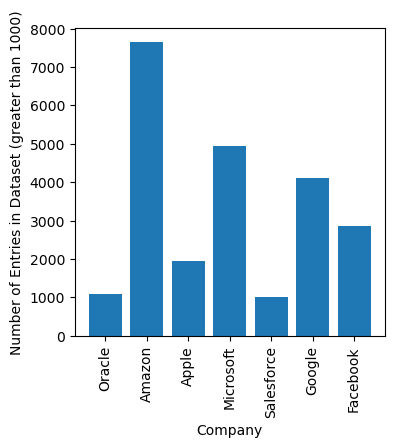

In [63]:
salary_vals = defaultdict(int)

for d in salaryAllData:
    company = d[2]
    salary_vals[company] += 1

# # x = salary_vals.keys()
# # y = salary_vals.values()


# # number of occurances for each company
# max = 0
# min = sys.maxsize

# for key, val in salary_vals.items():
#     if val > max:
#         max = val
#     if val < min:
#         min = val

# print(max, min)


x_small = []
y_small = []

x_large = []
y_large = []

for key, val in salary_vals.items():
    if val > 100 and val <1000:
        x_small.append(key)
        y_small.append(val)
    if val > 1000:
        x_large.append(key)
        y_large.append(val)



plt.figure(figsize=(11,4))
plt.bar(x_small, y_small)
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Number of Entries in Dataset (between 100 and 1000)')
plt.show()

plt.figure(figsize=(4,4))
plt.bar(x_large, y_large)
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Number of Entries in Dataset (greater than 1000)')
plt.show()

In [ ]:
# Salary vs Timestamp

In [ ]:
# Location Values

In [ ]:
# Salary vs Location

In [ ]:
# Company Values

In [ ]:
# Experience/Tenure Values

In [ ]:
# Degree Values

In [ ]:
# Race Values

In [ ]:
# Gender Values